# Splicing by chromosome
Compare the distribution of the five types of alternative splicing by chromosome and create the figure **figureSplicingByChromosome.pdf**.

In [1]:
suppressMessages({
    options(warn = -1) 
    library(ggplot2)
    library(viridis)
})

In [2]:
fromGTFSE.dat <- read.table("../data/fromGTF.SE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFSE.dat$AStype <- 'SE'
fromGTFRI.dat <- read.table("../data/fromGTF.RI.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFRI.dat$AStype <- 'RI'
fromGTFMXE.dat <- read.table("../data/fromGTF.MXE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFMXE.dat$AStype <- 'MXE'
fromGTFA5SS.dat <- read.table("../data/fromGTF.A5SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA5SS.dat$AStype <- 'A5SS'
fromGTFA3SS.dat <- read.table("../data/fromGTF.A3SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA3SS.dat$AStype <- 'A3SS'

In [3]:
summaryAS.df <- rbind(fromGTFSE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFRI.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFMXE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA5SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA3SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")])

In [4]:
chr_specific_splicing_SE <- table(summaryAS.df$chr[summaryAS.df$AStype == "SE"])
a_chr_SE <- unclass(chr_specific_splicing_SE)
# a_chr_SE
chr_specific_splicing_RI <- table(summaryAS.df$chr[summaryAS.df$AStype == "RI"])
a_chr_RI <- unclass(chr_specific_splicing_RI)
# a_chr_RI
chr_specific_splicing_MXE <- table(summaryAS.df$chr[summaryAS.df$AStype == "MXE"])
a_chr_MXE <- unclass(chr_specific_splicing_MXE)
# a_chr_MXE
chr_specific_splicing_A3SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A3SS"])
a_chr_A3SS <- unclass(chr_specific_splicing_A3SS)
#a_chr_A3SS
chr_specific_splicing_A5SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
a_chr_A5SS <- unclass(chr_specific_splicing_A5SS)
print("A5SS (other examples commented out):")
table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
#a_chr_A5SS

[1] "A5SS (other examples commented out):"



 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  496   155   386   354    59   212   188   348   410    74   400   387   135 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   60   129   368   184   210   216   284   166   162   191    10 

In [5]:
chr_splicing_dist <- rbind(cbind(data.matrix(a_chr_SE),   chr=names(a_chr_SE),  AStype = "SE"),
                           cbind(data.matrix(a_chr_RI),   chr=names(a_chr_RI),  AStype = "RI"),
                           cbind(data.matrix(a_chr_MXE),  chr=names(a_chr_MXE), AStype = "MXE"),
                           cbind(data.matrix(a_chr_A3SS), chr=names(a_chr_A3SS),AStype = "A3SS"),
                           cbind(data.matrix(a_chr_A5SS), chr=names(a_chr_A5SS),AStype = "A5SS"))
colnames(chr_splicing_dist)=c("Counts","Chr","AStype")
counts <- chr_splicing_dist[,"Counts"]
chr_splicing_df <- data.frame(chr_splicing_dist)
head(chr_splicing_df)
chr_splicing_df$Counts <- as.integer(counts)
head(chr_splicing_df)
head(chr_splicing_df$Counts)

,Counts,Chr,AStype
,<fct>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


[1] 3812 1458 2541 2540  663 1551

In [6]:
dim(chr_splicing_dist)

[1] 120   3

In [7]:
chromosomes <- names(a_chr_SE)
chromosomes <- chromosomes[order(chromosomes)]
chromosomes

[1] "chr1"  "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17"
[10] "chr18" "chr19" "chr2"  "chr20" "chr21" "chr22" "chr3"  "chr4"  "chr5" 
[19] "chr6"  "chr7"  "chr8"  "chr9"  "chrX"  "chrY"

In [8]:
chr_splicing_df[chr_splicing_df$Chr==chromosomes[1],]

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


In [9]:
N <- sum(chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],"Counts"])
message("We got ", N, " counts of differential splicing")

We got 6060 counts of differential splicing



In [10]:
df_chromosome     <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],]
df_chromosome

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


In [11]:
percentage <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
percentage

[1] 62.904290  9.966997  4.719472 14.224422  8.184818

In [12]:
df_plot <- data.frame()

for (i in 1:length(chromosomes)) {
    df_chromosome  <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[i],]
    percentage     <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
    final <- cbind(df_chromosome, Perc=percentage)
    if (i == 1)
        df_plot <- final 
    else
        df_plot <- rbind(df_plot, final)
}  

dim(df_plot)
head(df_plot)

[1] 120   4

,Counts,Chr,AStype,Perc
,<int>,<fct>,<fct>,<dbl>
chr1,3812,chr1,SE,62.904290
chr1.1,604,chr1,RI,9.966997
chr1.2,286,chr1,MXE,4.719472
chr1.3,862,chr1,A3SS,14.224422
chr1.4,496,chr1,A5SS,8.184818
chr10,1458,chr10,SE,70.096154


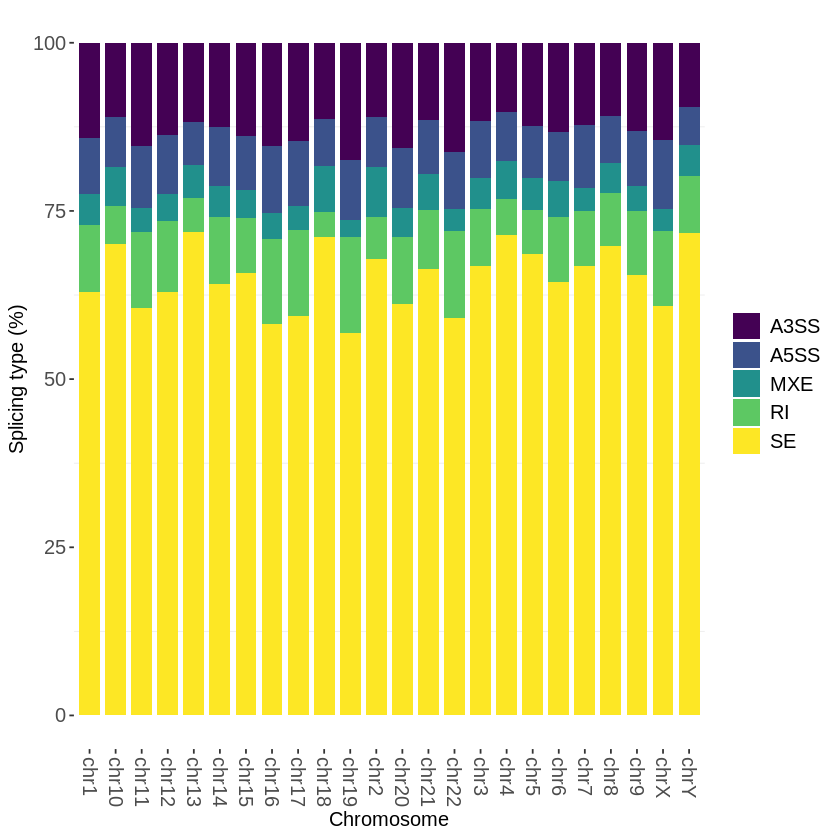

In [13]:
p<-ggplot(df_plot, 
       aes(x=Chr, y=Perc, fill = AStype, by = Chr)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Chromosome")
p

In [14]:
ggsave(file = "../pdf/figureSplicingByChromosome.pdf", plot = p)

Saving 6.67 x 6.67 in image



In [15]:
table(df_plot$AStype)


A3SS A5SS  MXE   RI   SE 
  24   24   24   24   24 

In [16]:
se.count <- sum(a_chr_SE)
ri.count <- sum(a_chr_RI)
mxe.count <- sum(a_chr_MXE)
a3ss.count <- sum(a_chr_A3SS)
a5ss.count <- sum(a_chr_A5SS)
total <- se.count + ri.count + mxe.count + a3ss.count + a5ss.count
se.p <- 100* se.count/total
ri.p <- 100* ri.count/total
mxe.p <- 100* mxe.count/total
a3ss.p <- 100* a3ss.count/total
a5ss.p <- 100* a5ss.count/total
message("SE: ", se.p, "%, RI: ", ri.p, "% MXE: ", mxe.p, "%, A3ss: ", a3ss.p, "%, A5ss: ", a5ss.p, "%")

SE: 64.167394512544%, RI: 9.50516519591603% MXE: 4.48604041803451%, A3ss: 13.4325211577267%, A5ss: 8.40887871577869%

